In [1]:
import pandas as pd

#  Reading Data

In [2]:
data = pd.read_csv('train.tsv',sep="\t")

In [3]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [4]:
data.head(15)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [6]:
data.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

C:\Users\Gupta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

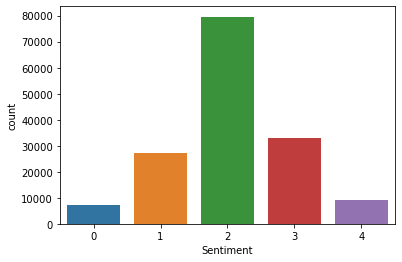

In [7]:
import seaborn as sns

sns.countplot('Sentiment',data=data)

#  Preprocessing and  feature Generation (Bag of words)

In [8]:
from sklearn.feature_extraction.text import  CountVectorizer
from nltk.tokenize import  RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

cv = CountVectorizer(lowercase = True,
                     stop_words = 'english',
                     ngram_range = (1,1),
                     tokenizer = token.tokenize)

text_counts = cv.fit_transform(data['Phrase'])

#  Split Dataset

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =  train_test_split(text_counts,
                                                 data['Sentiment'],
                                                 test_size = 0.3,
                                                 random_state = 1)

In [10]:
X_train

<109242x14988 sparse matrix of type '<class 'numpy.int64'>'
	with 419248 stored elements in Compressed Sparse Row format>

In [11]:
X_test

<46818x14988 sparse matrix of type '<class 'numpy.int64'>'
	with 179696 stored elements in Compressed Sparse Row format>

In [12]:
Y_test

78734     1
126189    0
132845    2
126239    2
30608     1
         ..
105738    2
1174      2
104741    3
121516    4
41603     2
Name: Sentiment, Length: 46818, dtype: int64

In [13]:
Y_train

144047    2
135377    2
97507     3
5780      2
39068     3
         ..
73349     2
109259    2
50057     2
5192      4
128037    3
Name: Sentiment, Length: 109242, dtype: int64

In [14]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, Y_train)

In [15]:
predicted = clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(Y_test,predicted))

MultinomialNB Accuracy: 0.6049169122986885


In [16]:
clf.predict(X_test)

array([2, 1, 2, ..., 2, 3, 2], dtype=int64)

In [17]:
clf.score(X_test,Y_test)

0.6049169122986885

In [18]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train, Y_train)

predicted= clf.predict(X_test)

print("LogReg Accuracy:",metrics.accuracy_score(Y_test, predicted))


LogReg Accuracy: 0.6375752915545303


C:\Users\Gupta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#  Preprocessing and Feature Generation (TF-IDF)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf=TfidfVectorizer(lowercase=True,
                     stop_words='english',
                     ngram_range = (1,1),
                     tokenizer = token.tokenize)

text_tf= tf.fit_transform(data['Phrase'])

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_tf, 
                                                    data['Sentiment'], 
                                                    test_size=0.3, 
                                                    random_state=1)

In [21]:
from sklearn.naive_bayes import MultinomialNB

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)

predicted= clf.predict(X_test)

print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.5860993634926738


In [22]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train, y_train)

predicted= clf.predict(X_test)

print("LogReg Accuracy:",metrics.accuracy_score(y_test, predicted))

LogReg Accuracy: 0.6240121320859499


C:\Users\Gupta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#  Using Postive and Negative Word list

In [23]:
pos=open('positive-words.txt')
neg=open('negative-words.txt')


pos_list=pos.read().split()
neg_list=neg.read().split() # split into lines

In [24]:
len(pos_list),len(neg_list)

(2006, 4783)

In [25]:
from nltk.tokenize import word_tokenize
score=[]
for review in data['Phrase']:
    pos_count=0
    neg_count=0
    tokenized_words=word_tokenize(review.lower())
    for word in tokenized_words:
        if word in pos_list:     # count positive words in a review
            pos_count=pos_count+1
        if word in neg_list: 
            neg_count=neg_count+1 # count negative word in a review
            
    # append score        
    score.append(pos_count-neg_count)

In [26]:
len(score)

156060

In [27]:
data['score']=score

In [28]:
data.head(15)

,PhraseId,SentenceId,Phrase,Sentiment,score
0,1,1,A series of escapades demonstrating the adage ...,1,2
1,2,1,A series of escapades demonstrating the adage ...,2,1
2,3,1,A series,2,0
3,4,1,A,2,0
4,5,1,series,2,0
5,6,1,of escapades demonstrating the adage that what...,2,1
6,7,1,of,2,0
7,8,1,escapades demonstrating the adage that what is...,2,1
8,9,1,escapades,2,0
9,10,1,demonstrating the adage that what is good for ...,2,1


#  Sentiment score using TextBlob

In [29]:
from textblob import TextBlob

score=[]
for review in data['Phrase']:
    testimonial = TextBlob(review)
    score.append(testimonial.sentiment.polarity)
    
data['textblob_score']=score
data.head(15)

,PhraseId,SentenceId,Phrase,Sentiment,score,textblob_score
0,1,1,A series of escapades demonstrating the adage ...,1,2,0.4
1,2,1,A series of escapades demonstrating the adage ...,2,1,0.7
2,3,1,A series,2,0,0.0
3,4,1,A,2,0,0.0
4,5,1,series,2,0,0.0
5,6,1,of escapades demonstrating the adage that what...,2,1,0.7
6,7,1,of,2,0,0.0
7,8,1,escapades demonstrating the adage that what is...,2,1,0.7
8,9,1,escapades,2,0,0.0
9,10,1,demonstrating the adage that what is good for ...,2,1,0.7
